In [4]:
import torch 
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
drop_rate = 0
m = nn.Sequential(
    nn.Conv2d(2, 84, 5, stride=2,padding=1),
    nn.BatchNorm2d(84),
    nn.ReLU(True),
    nn.Dropout(drop_rate),

    nn.Conv2d(84, 168, 5, stride=2, padding=1),
    nn.BatchNorm2d(168),
    nn.ReLU(True),
    nn.Dropout(drop_rate) ,

    nn.MaxPool2d(2, stride=1),
    nn.Dropout(drop_rate) ,

    nn.Flatten(),

    nn.LSTM(387072, 256, 2, batch_first=True)
)

device = torch.device("cpu")

input = torch.randn(1, 2, 200, 200)

output = m(input)
output.size()

AttributeError: 'tuple' object has no attribute 'size'

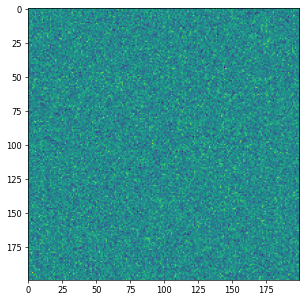

In [2]:
output = m(input)
plt.figure(figsize=(6, 6), dpi=60)
plt.imshow(input[0,0,:,:].detach().numpy())

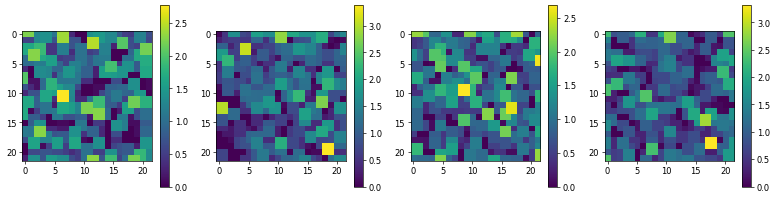

In [3]:
plt.figure(figsize=(16, 4), dpi=60)

plt.subplot(1,4,1)
plt.imshow(output[0,0,:,:].detach().numpy())
plt.colorbar()
plt.subplot(1,4,2)
plt.imshow(output[0,1,:,:].detach().numpy())
plt.colorbar()
plt.subplot(1,4,3)
plt.imshow(output[0,2,:,:].detach().numpy())
plt.colorbar()
plt.subplot(1,4,4)
plt.imshow(output[0,3,:,:].detach().numpy())
plt.colorbar()

In [4]:
output.shape

torch.Size([1, 336, 22, 22])

In [5]:
m1 = nn.Sequential(
    nn.ConvTranspose2d(336, 672, 5, stride=2, padding=0),
    nn.BatchNorm2d(672),
    nn.ReLU(True),

    nn.ConvTranspose2d(672, 336, 5, stride=2, padding=0),
    nn.BatchNorm2d(336),
    nn.ReLU(True),

    nn.ConvTranspose2d(336, 84, 5, stride=2, padding=0),
    nn.BatchNorm2d(84),
    nn.ReLU(True),

    nn.ConvTranspose2d(84, 1, 4, stride=1,padding=0),
)


output_1 = m1(output)
output_1.shape

torch.Size([1, 1, 200, 200])

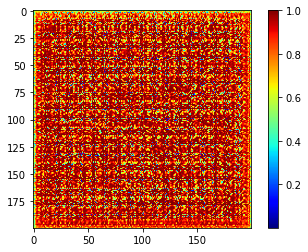

In [6]:
import matplotlib.pyplot as plt
plt.imshow(output_1[0,0,:,:].cpu().detach().numpy(), cmap='jet')
plt.colorbar()

In [7]:
# (input-1)*stride+kernal-2*padding

In [26]:
(49-1)*1+3-2*1

49

In [29]:
(49-1)*2+3

99

In [31]:
(99-1)*2+4

200

In [12]:
(197-1)*1+4

200

In [10]:
import h5py
hdf5_file = h5py.File('./reformattedData/CNN_all_cases_200x200_per100_ini_compressed.hdf5', mode='r')
indata = hdf5_file.get('input')
indata.shape

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = './reformattedData/CNN_all_cases_200x200_per100_ini_compressed.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

NameError: name 'indata' is not defined

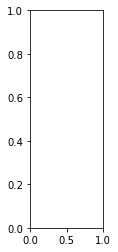

In [9]:
import matplotlib.pyplot as plt
ind = 500
plt.subplot(1,4,1)
plt.imshow(indata[ind,0,:,:])
plt.subplot(1,4,2)
plt.imshow(indata[ind,1,:,:])
plt.subplot(1,4,3)
plt.imshow(indata[ind,2,:,:])
plt.subplot(1,4,4)
plt.imshow(indata[ind,3,:,:])

In [3]:
from dataset import H5Dataset

import torch
from torch.utils import data
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.sampler import SequentialSampler
import numpy as np

dataset = H5Dataset('./reformattedData_20220523/CNN_200x200_per100_prePhiBinary_tipsTheta_2channels_compressed.hdf5')

test_split = .25
shuffle_dataset = True
random_seed = 42

k_folder = 1

#dataset_size = len(dataset)
dataset_size = 20
indices = list(range(dataset_size))
split = int(np.floor(test_split * dataset_size))
if shuffle_dataset:
    np.random.seed(random_seed)
    np.random.shuffle(indices)
train_indices, test_indices = indices[split:], indices[:split]
print(train_indices)
print(test_indices)

# Creating PT data samplers and loaders:
train_sampler = SubsetRandomSampler(train_indices)
test_sampler = SubsetRandomSampler(test_indices)

[5, 11, 3, 18, 16, 13, 2, 9, 19, 4, 12, 7, 10, 14, 6]
[0, 17, 15, 1, 8]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [5]:
model = keras.models.load_model('./tmp/model_conv_lstm_5')
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 100,   0           []                               
                                100, 3)]                                                          
                                                                                                  
 time_distributed (TimeDistribu  (None, None, 48, 48  4864       ['input_1[0][0]']                
 ted)                           , 64)                                                             
                                                                                                  
 time_distributed_1 (TimeDistri  (None, None, 22, 22  204928     ['time_distributed[0][0]']       
 buted)                         , 128)                                                        

In [6]:
import h5py
h5 = h5py.File('./reformattedData_20220531/All_cases_100x100_per500_zoom.hdf5', mode='r')
dataset = h5.get('phi')

# # Split into train and validation sets using indexing to optimize memory.
data_sz = dataset.shape[0]
indexes = np.arange(data_sz)
np.random.shuffle(indexes)
train_index = np.sort(indexes[: int(0.75 * data_sz)])
val_index = np.sort(indexes[int(0.75 * data_sz) :])
print(train_index)
print(val_index)

[ 0  1  2  3  5  7  8  9 10 11 12 13 14 15 16 20 21 22 23 24 26 27 29 30
 31 32 34 36 37 38 40 42 43 44 45 46 47 48 49 50 51 52 53 54 55 60 62 63
 65 66 67 68 69 70 72 73 74 75 79 80 81 82]
[ 4  6 17 18 19 25 28 33 35 39 41 56 57 58 59 61 64 71 76 77 78]


In [7]:
# this part is a bit slow
train_dataset = dataset[train_index,...]
val_dataset = dataset[val_index,...]

dataset.shape

(83, 70, 100, 100, 1)

In [9]:
# We'll define a helper function to shift the frames, where
# `x` is frames 0 to n - 1, and `y` is frames 1 to n.
def create_shifted_frames(data):
    x = data[:, 0 : data.shape[1] - 1, :, :]
    y = data[:, 1 : data.shape[1], :, :, 0]
    y = np.expand_dims(y,4)
    return x, y

def create_shifted_frames_3to1(data):
    x1 = np.expand_dims(data[:, 0 : data.shape[1] - 3, :, :, 0],4)
    x2 = np.expand_dims(data[:, 1 : data.shape[1] - 2, :, :, 0],4)
    x3 = np.expand_dims(data[:, 2 : data.shape[1] - 1, :, :, 0],4)
    x = np.concatenate((x1,x2,x3), axis=4)
    y = data[:, 3 : data.shape[1], :, :, 0]
    y = np.expand_dims(y,4)
    return x,y

# Apply the processing function to the datasets.
# x_train, y_train = create_shifted_frames(train_dataset)
# x_val, y_val = create_shifted_frames(val_dataset)
x_train, y_train = create_shifted_frames_3to1(train_dataset)
x_val, y_val = create_shifted_frames_3to1(val_dataset)

# Inspect the dataset.
print("Training Dataset Shapes: " + str(x_train.shape) + ", " + str(y_train.shape))
print("Validation Dataset Shapes: " + str(x_val.shape) + ", " + str(y_val.shape))

Training Dataset Shapes: (62, 67, 100, 100, 3), (62, 67, 100, 100, 1)
Validation Dataset Shapes: (21, 67, 100, 100, 3), (21, 67, 100, 100, 1)


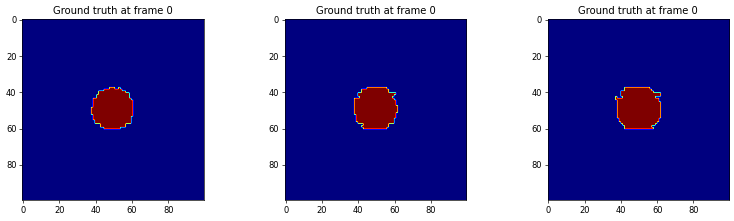

2022-06-03 12:40:46.430517: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8303
2022-06-03 12:40:47.202327: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


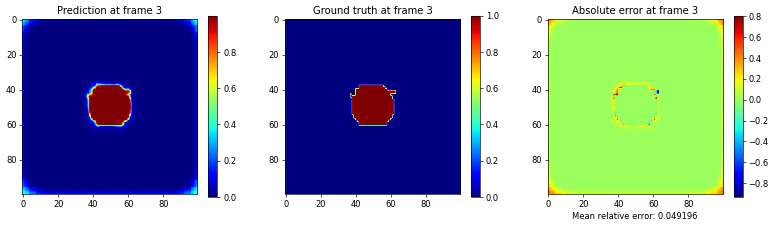

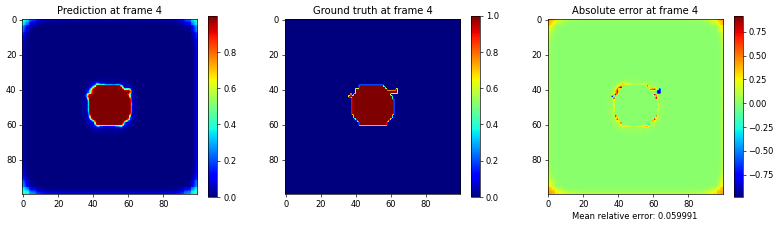

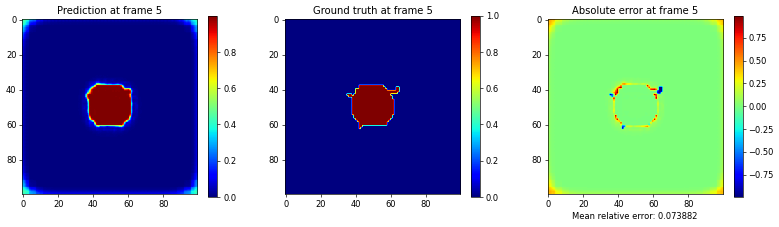

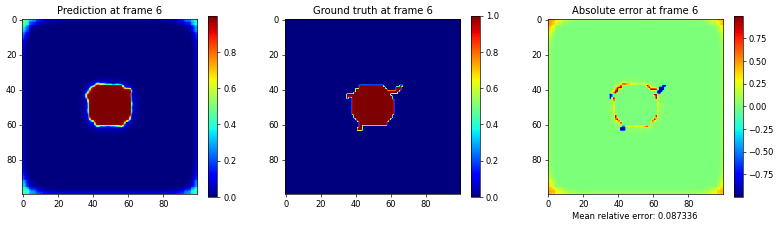

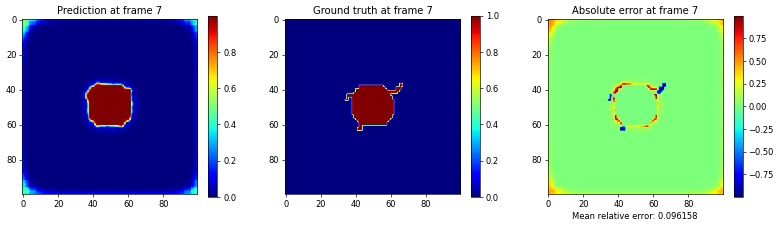

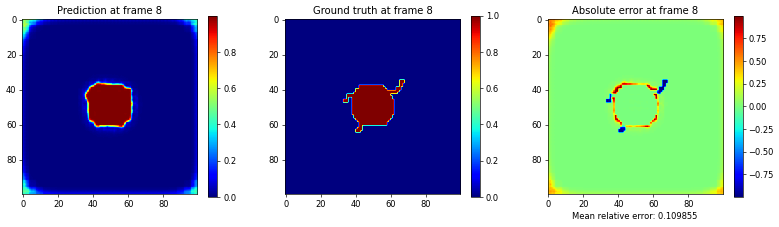

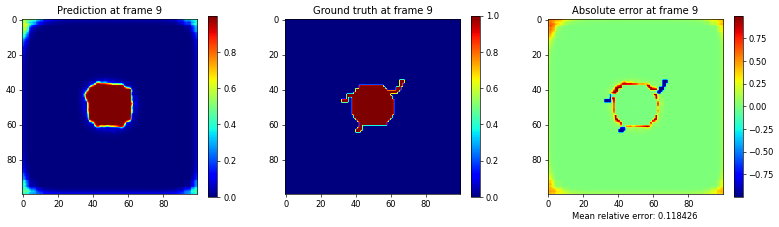

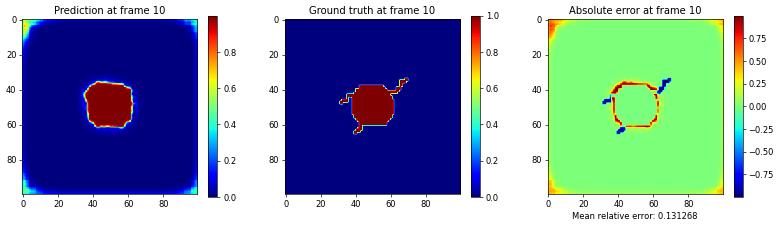

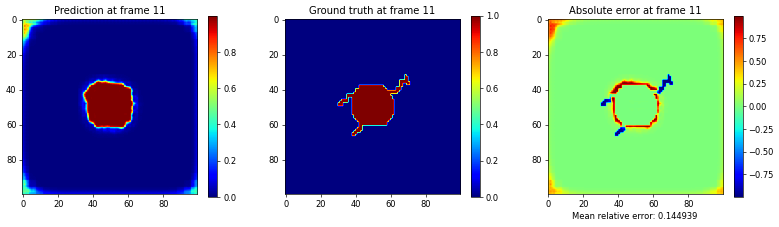

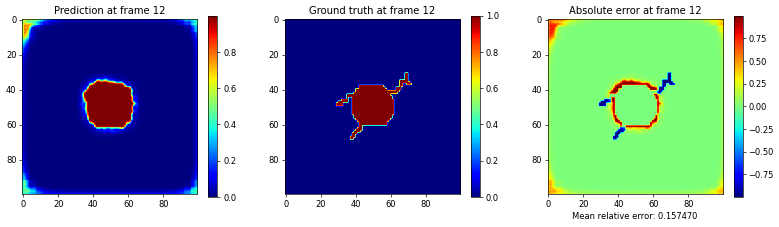

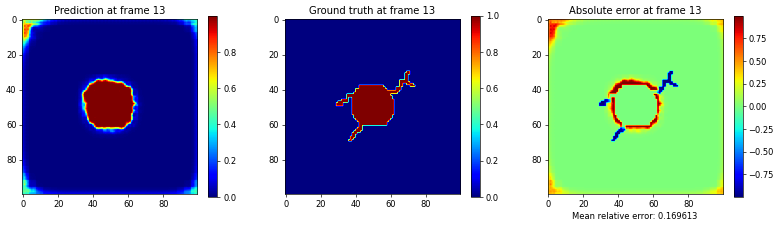

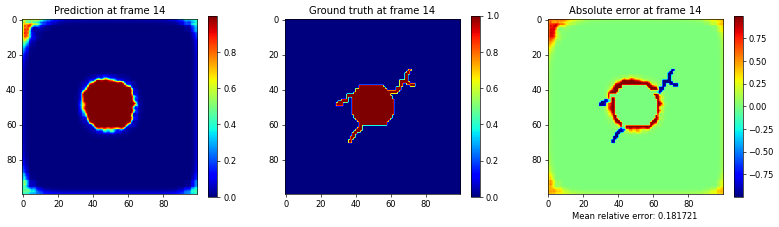

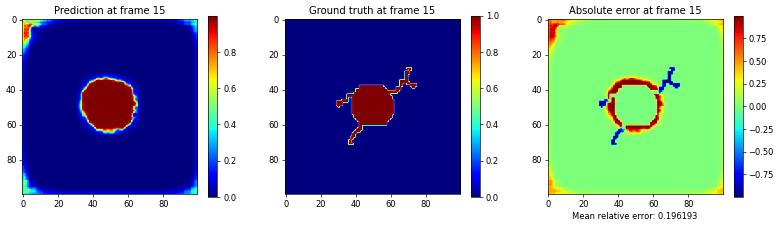

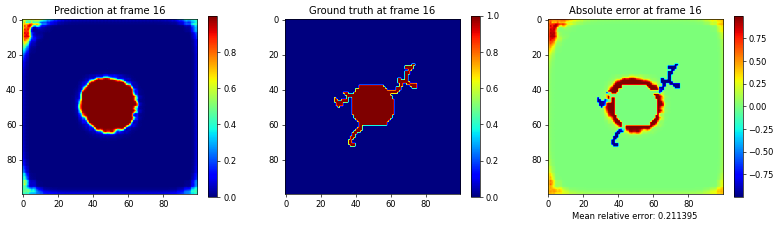

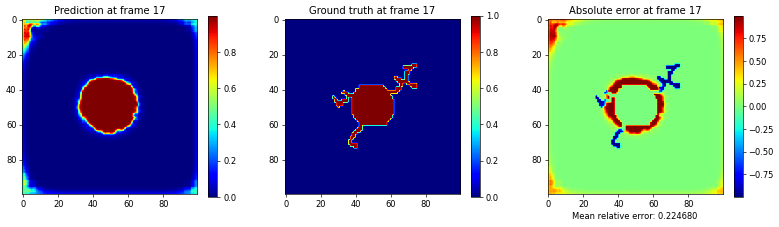

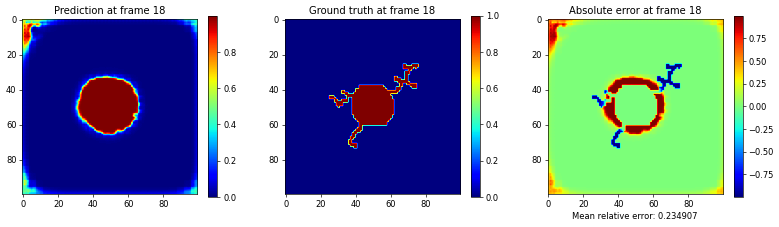

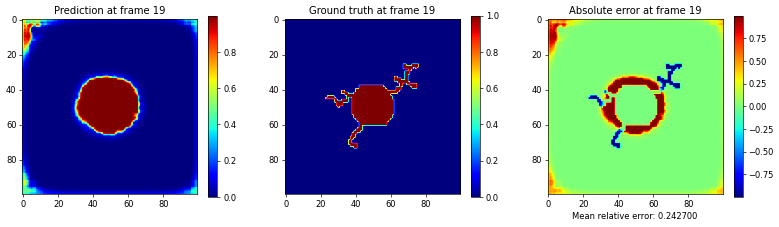

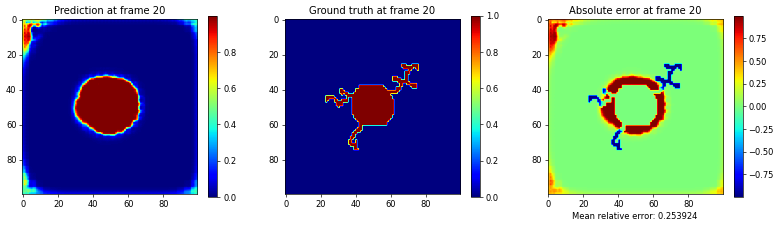

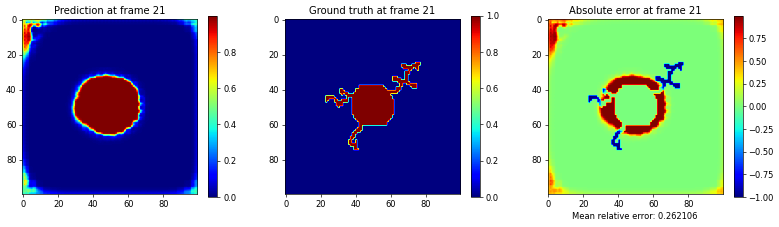

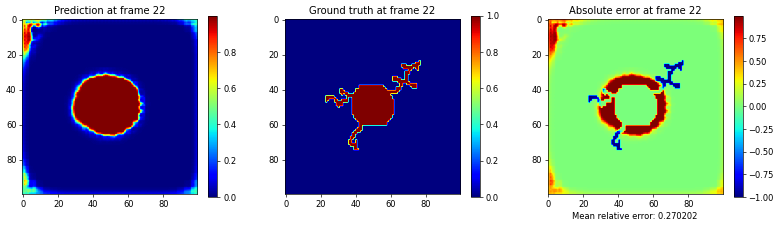

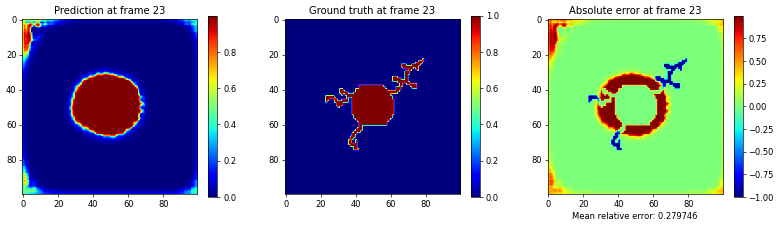

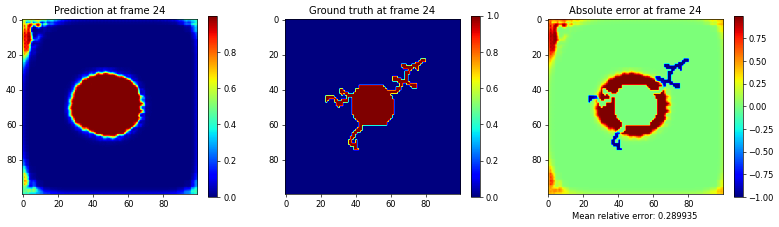

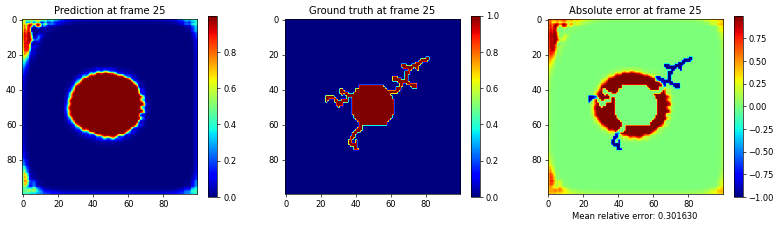

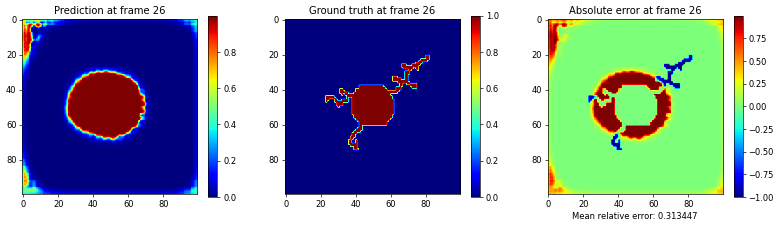

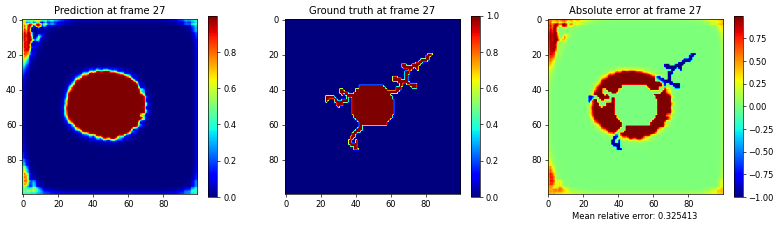

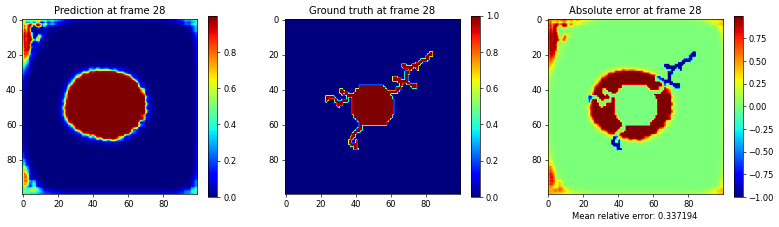

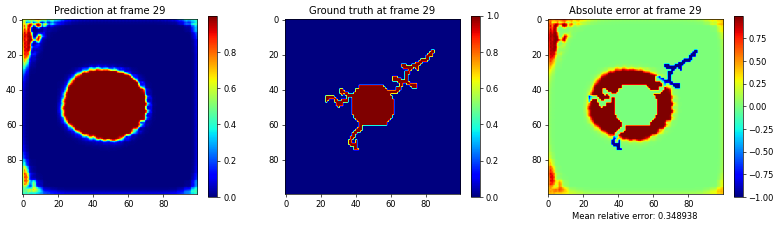

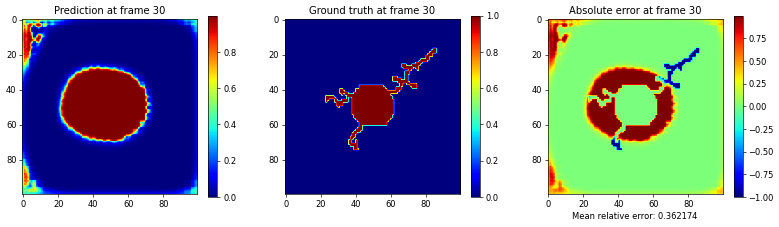

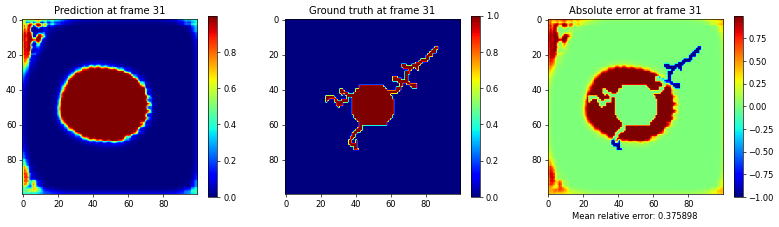

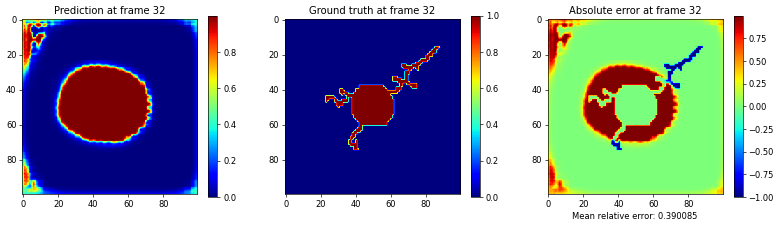

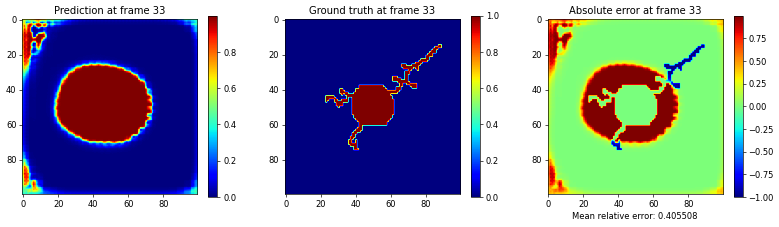

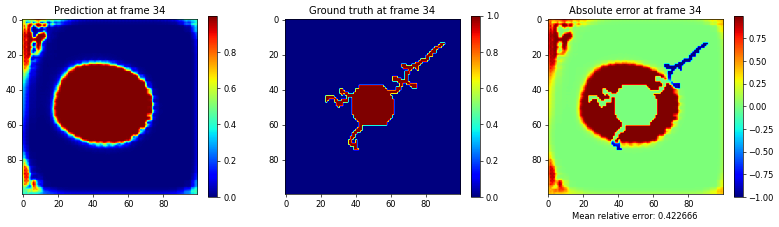

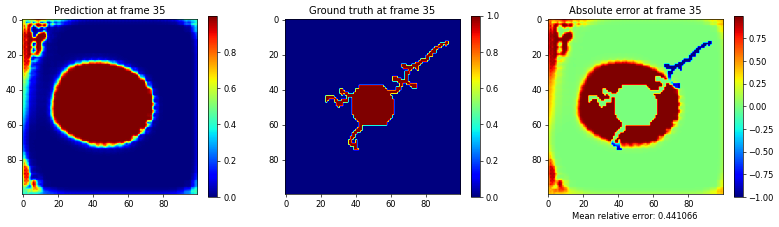

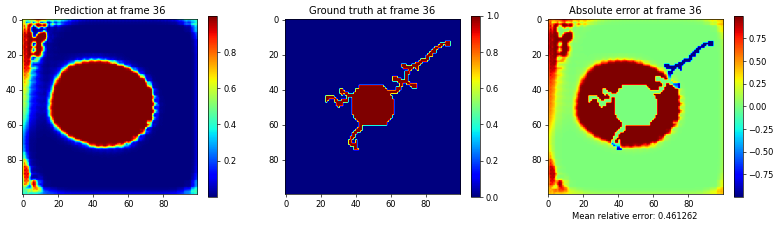

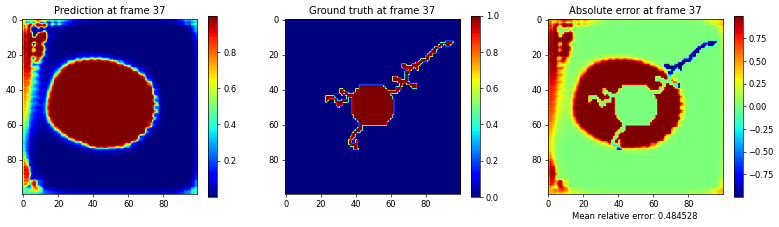

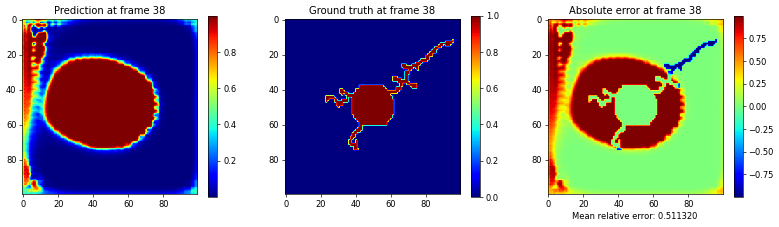

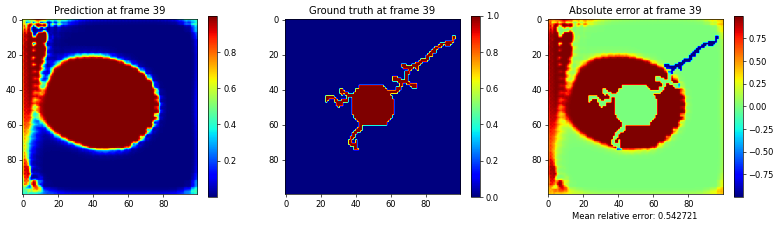

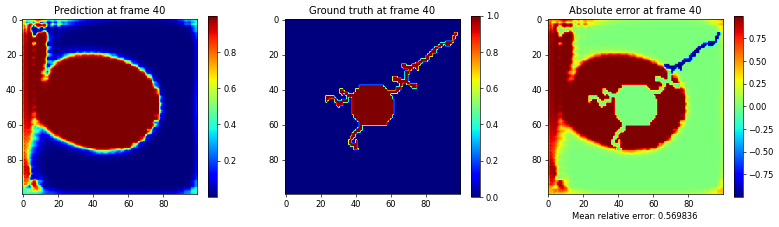

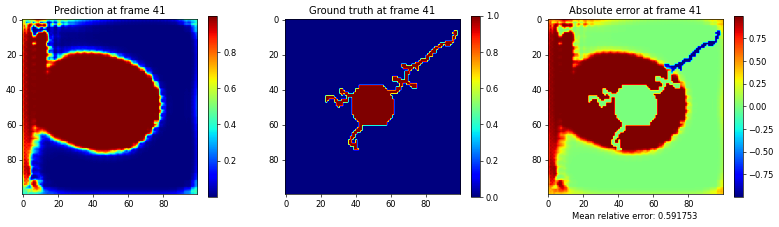

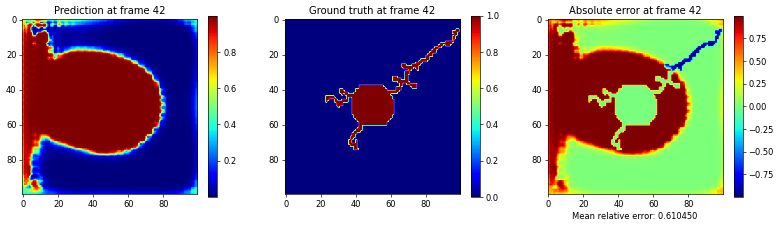

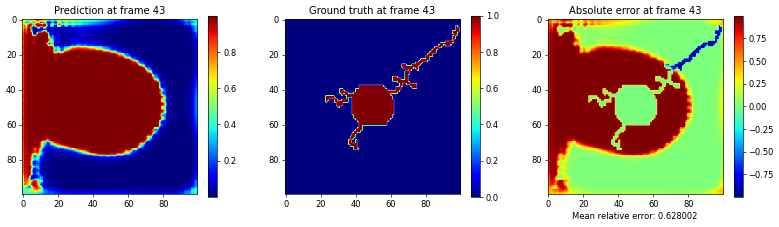

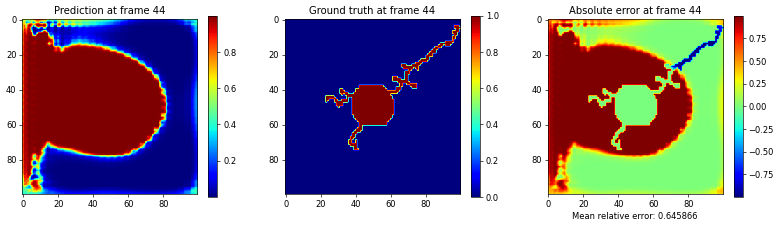

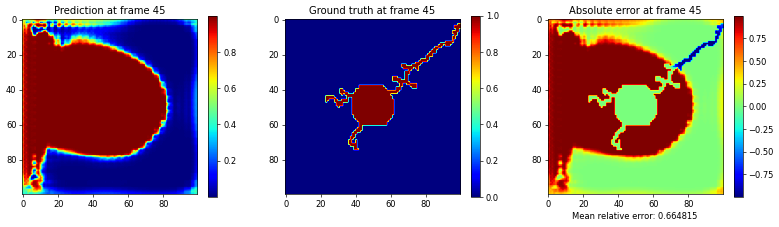

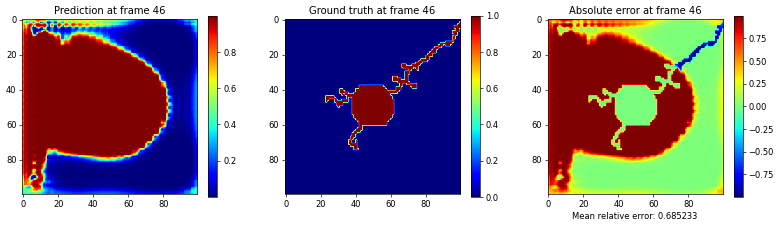

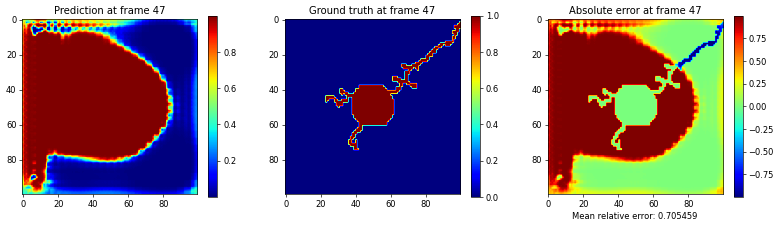

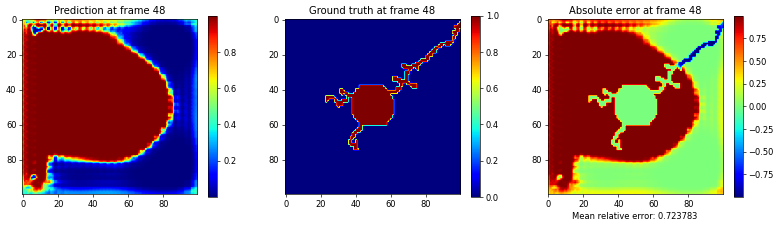

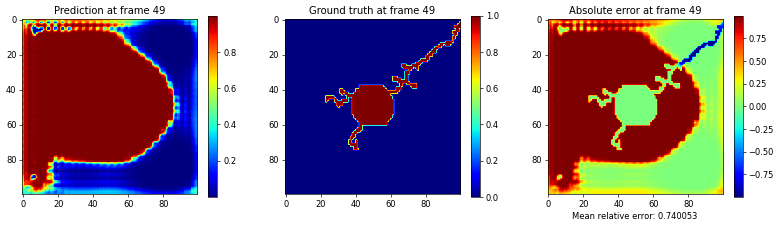

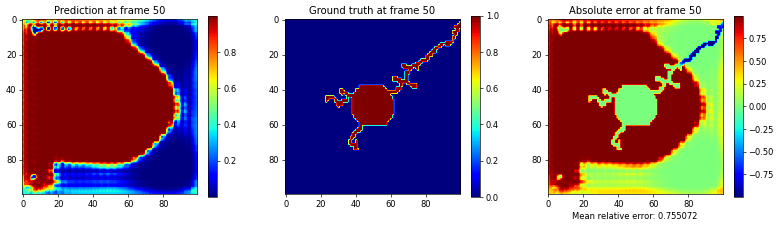

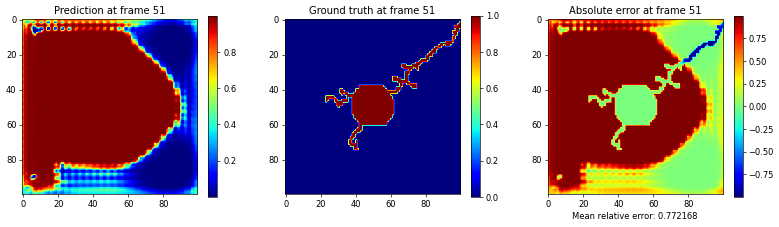

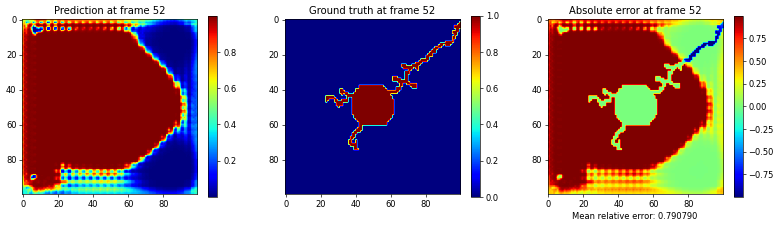

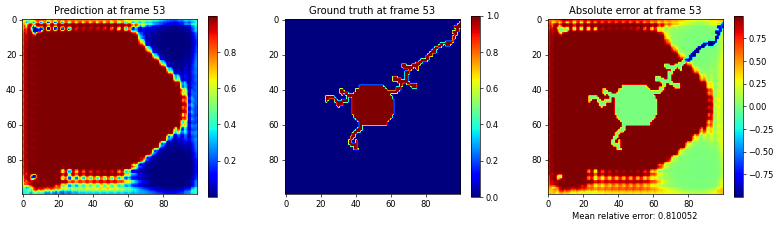

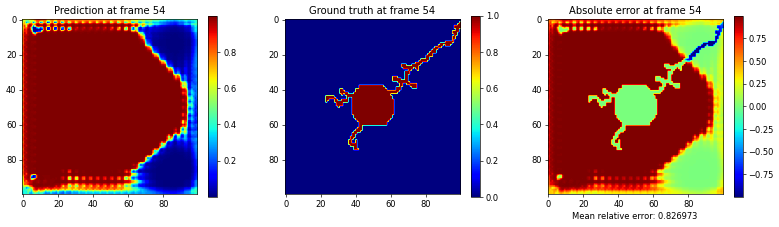

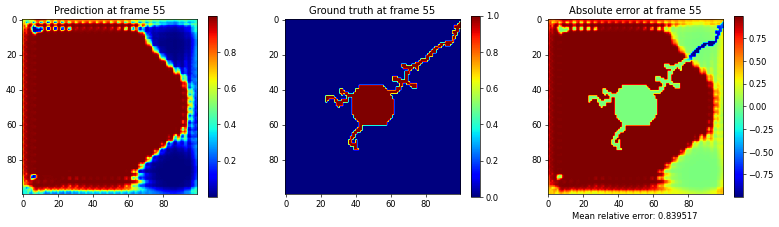

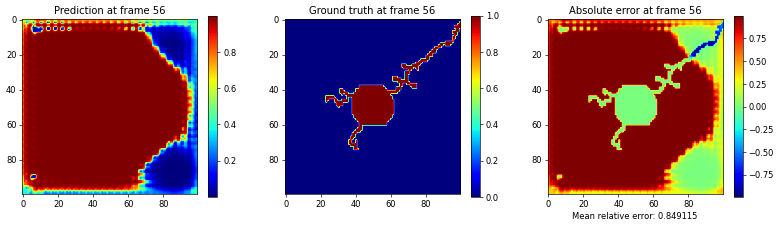

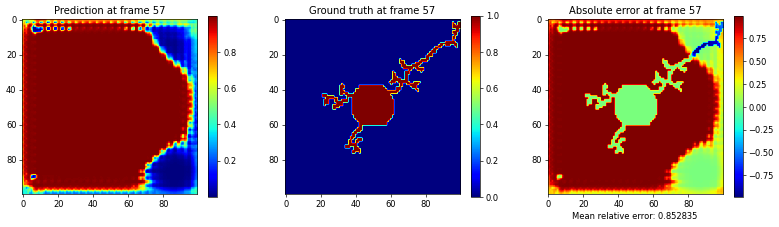

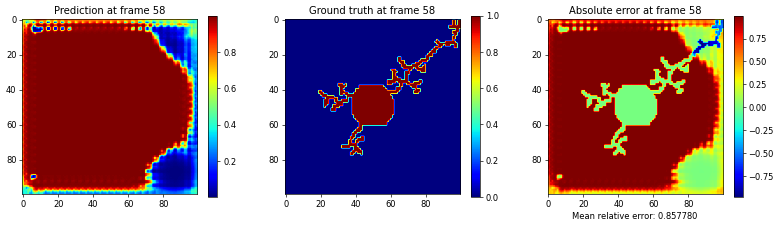

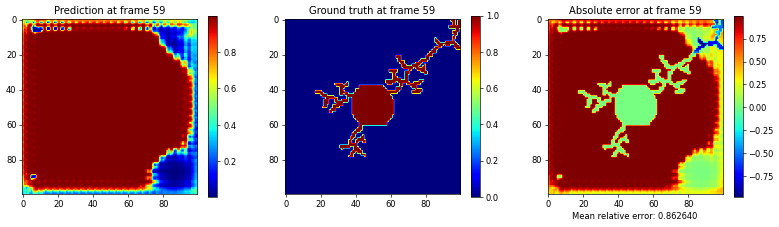

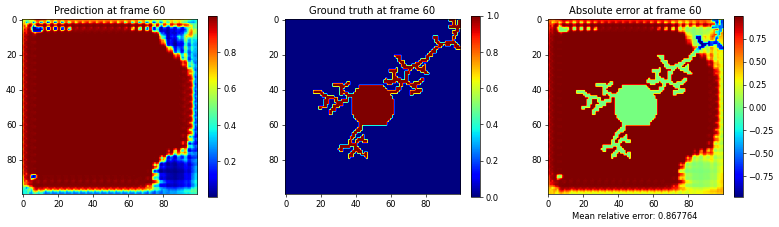

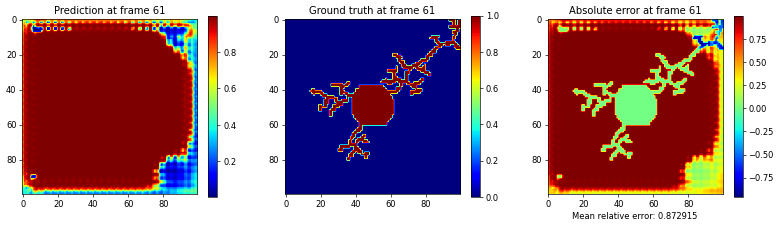

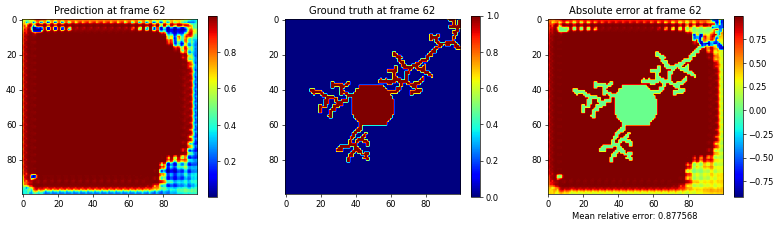

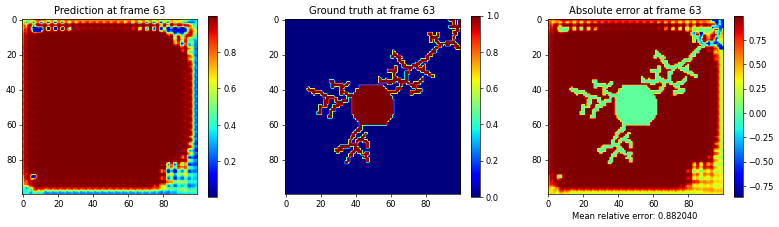

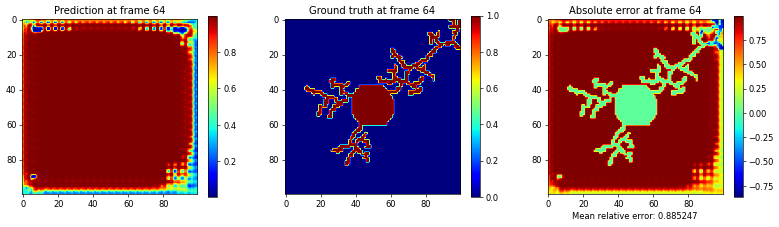

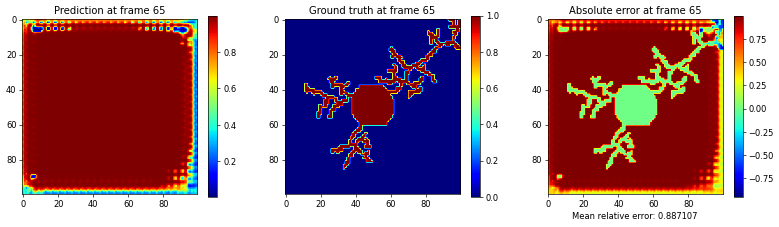

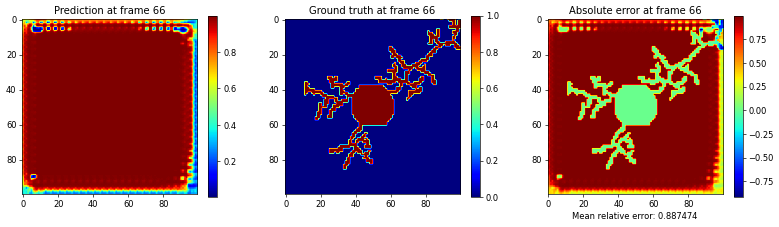

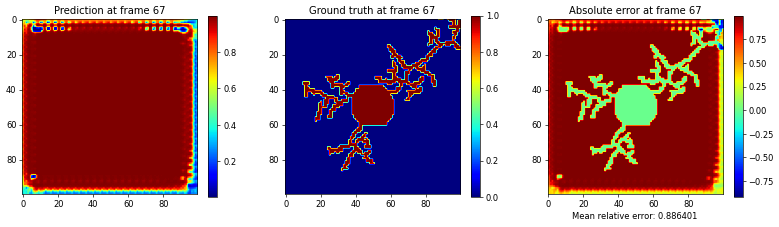

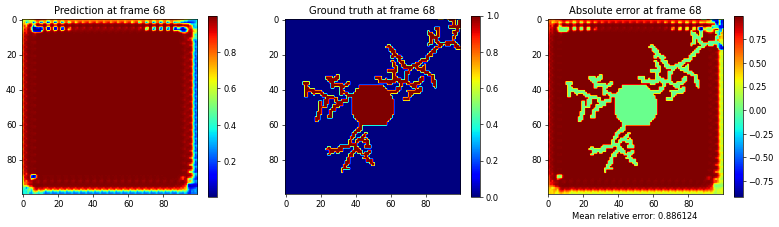

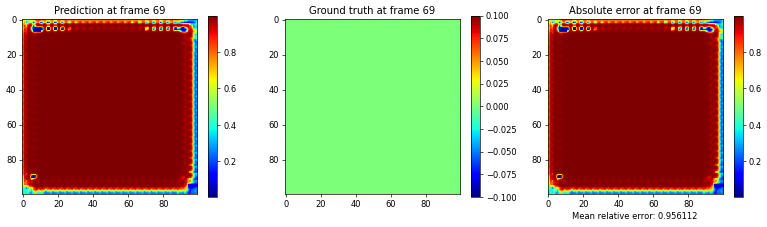

In [10]:
rand_case = np.random.randint((len(val_dataset)))

example_x = x_val[rand_case,...]
example_y = y_val[rand_case,...]

plt.figure(figsize=(16, 4), dpi=60)
plt.subplot(1,3,1)
plt.imshow(example_x[0,:,:,0], cmap='jet')
plt.title('Ground truth at frame 0')

plt.subplot(1,3,2)
plt.imshow(example_x[0,:,:,1], cmap='jet')
plt.title('Ground truth at frame 0')

plt.subplot(1,3,3)
plt.imshow(example_x[0,:,:,2], cmap='jet')
plt.title('Ground truth at frame 0')
plt.savefig("./Figure/frame_0to3.png")
plt.show()

frames = []
x_in = np.expand_dims(np.expand_dims(example_x[0,...],axis=0),axis=0)

for i in range(example_x.shape[0]):

    new_prediction = model.predict(x_in)
    frames.append(new_prediction[0,0,:,:,0])
    temp = np.zeros([1,1,100,100,3])

    temp[0,0,:,:,0] = x_in[0,0,:,:,1]
    temp[0,0,:,:,1] = x_in[0,0,:,:,2]
    temp[0,0,:,:,2] = new_prediction[0,0,:,:,0]

    x_in = temp


    mre = np.sqrt(np.sum(np.square(new_prediction[0,0,:,:,0]-example_y[i,:,:,0])/(new_prediction.shape[2]*new_prediction.shape[3])))

    plt.figure(figsize=(16, 4), dpi=60)

    plt.subplot(1,3,1)
    plt.imshow(new_prediction[0,0,:,:,0], cmap='jet')
    plt.colorbar()
    plt.title('Prediction at frame %d'%(i+3))

    plt.subplot(1,3,2)
    plt.imshow(example_y[i,:,:,0], cmap='jet')
    plt.colorbar()
    plt.title('Ground truth at frame %d'%(i+3))

    plt.subplot(1,3,3)
    plt.imshow(new_prediction[0,0,:,:,0]-example_y[i,:,:,0], cmap='jet')
    plt.colorbar()
    plt.title('Absolute error at frame %d'%(i+3))
    plt.xlabel('Mean relative error: %f'%mre)

    plt.savefig("./Figure/frame_%d.png"%(i+3))
    plt.show()


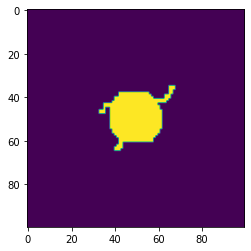

In [12]:
import matlab.engine
eng = matlab.engine.start_matlab()

plt.imshow(example_y[5,:,:,0])

IndexError: index 1 is out of bounds for axis 3 with size 1

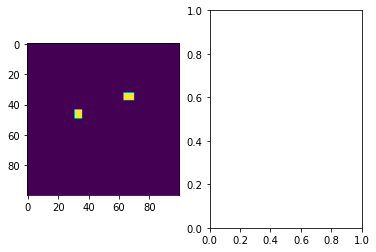

In [16]:
tips = eng.generate_tips_for_python(matlab.double(example_y[5,:,:,0]),5*500)

plt.imshow(tips)

In [22]:
mre = []
for c in range(len(val_dataset)):
    example_x = x_val[c,...]
    example_y = y_val[c,...]
    x_in = np.expand_dims(np.expand_dims(example_x[0,...],axis=0),axis=0)
    for i in range(example_x.shape[0]):

        new_prediction = model.predict(x_in)
        temp = np.zeros([1,1,100,100,3])

        temp[0,0,:,:,0] = x_in[0,0,:,:,1]
        temp[0,0,:,:,1] = x_in[0,0,:,:,2]
        temp[0,0,:,:,2] = new_prediction[0,0,:,:,0]

        x_in = temp

        mre.append(np.sqrt(np.sum(np.square(new_prediction[0,0,:,:,0]-example_y[i,:,:,0])/(new_prediction.shape[2]*new_prediction.shape[3]))))

mre = np.average(np.array(mre))
print('Mean relative error is:%f'%mre)

Mean relative error is:0.487325


: 